In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('internship_train.csv')
test = pd.read_csv('internship_hidden_test.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


## Split the data

In [3]:
X = df.drop('target', axis=1)
y = df['target'].copy()
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4)

print(f'train_X shape: {train_X.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'valid_X shape: {valid_X.shape}')
print(f'valid_y shape: {valid_y.shape}')

train_X

train_X shape: (54000, 53)
train_y shape: (54000,)
valid_X shape: (36000, 53)
valid_y shape: (36000,)


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
3174,121,363,466,260,4,220,-5.000000,0.848610,0,384,...,0.484817,13.654293,10.176862,1.584187,10.984683,7.328804,3.492303,8.123517,3.672093,13.799899
6697,159,1,51,33,390,332,-8.774964,0.053532,0,446,...,2.195474,1.337534,1.532722,8.938785,8.008594,2.596263,7.175313,2.614525,0.851519,12.908767
28224,15,171,346,458,249,222,9.273618,0.427359,1,162,...,3.019992,10.180035,11.234666,7.585475,6.626177,9.999581,0.314911,8.828271,6.938248,12.782797
69571,164,85,329,21,276,194,-9.165151,0.685345,0,382,...,6.031289,11.365204,12.200659,10.375783,6.586393,3.246047,11.873995,3.941838,6.382089,2.272350
24648,3,167,170,491,16,103,-9.433981,0.420983,0,475,...,10.707920,9.098623,3.340949,14.412875,8.968094,12.362482,4.464892,12.795001,14.122512,9.515841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,449,337,273,267,485,314,8.485281,0.918197,1,477,...,6.383560,14.705570,6.385962,6.475282,12.311633,8.033272,10.527716,13.572908,12.765496,0.296381
27938,363,69,182,66,496,268,-7.615773,0.305970,0,216,...,8.181088,3.954195,0.101175,5.928232,13.885376,10.115059,1.216836,14.357121,5.561805,0.648343
82350,248,446,436,120,83,163,-8.717798,0.267669,0,491,...,9.414216,14.106252,12.153141,13.200762,1.540206,5.718560,7.127563,10.766554,7.821424,4.652613
43225,226,206,32,93,256,181,-6.855655,0.907864,0,186,...,2.148845,2.461685,7.832727,1.420646,8.346611,7.382615,2.930006,3.625270,2.757039,6.786222


## Explore the data

In [5]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [7]:
df.dtypes

0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6         float64
7         float64
8           int64
9           int64
10          int64
11          int64
12          int64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

In [8]:
pd.set_option('display.max_columns', None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

In [9]:
df['8'].value_counts()

0    45073
1    44927
Name: 8, dtype: int64

In [10]:
df[df.duplicated() == True].shape

(0, 54)

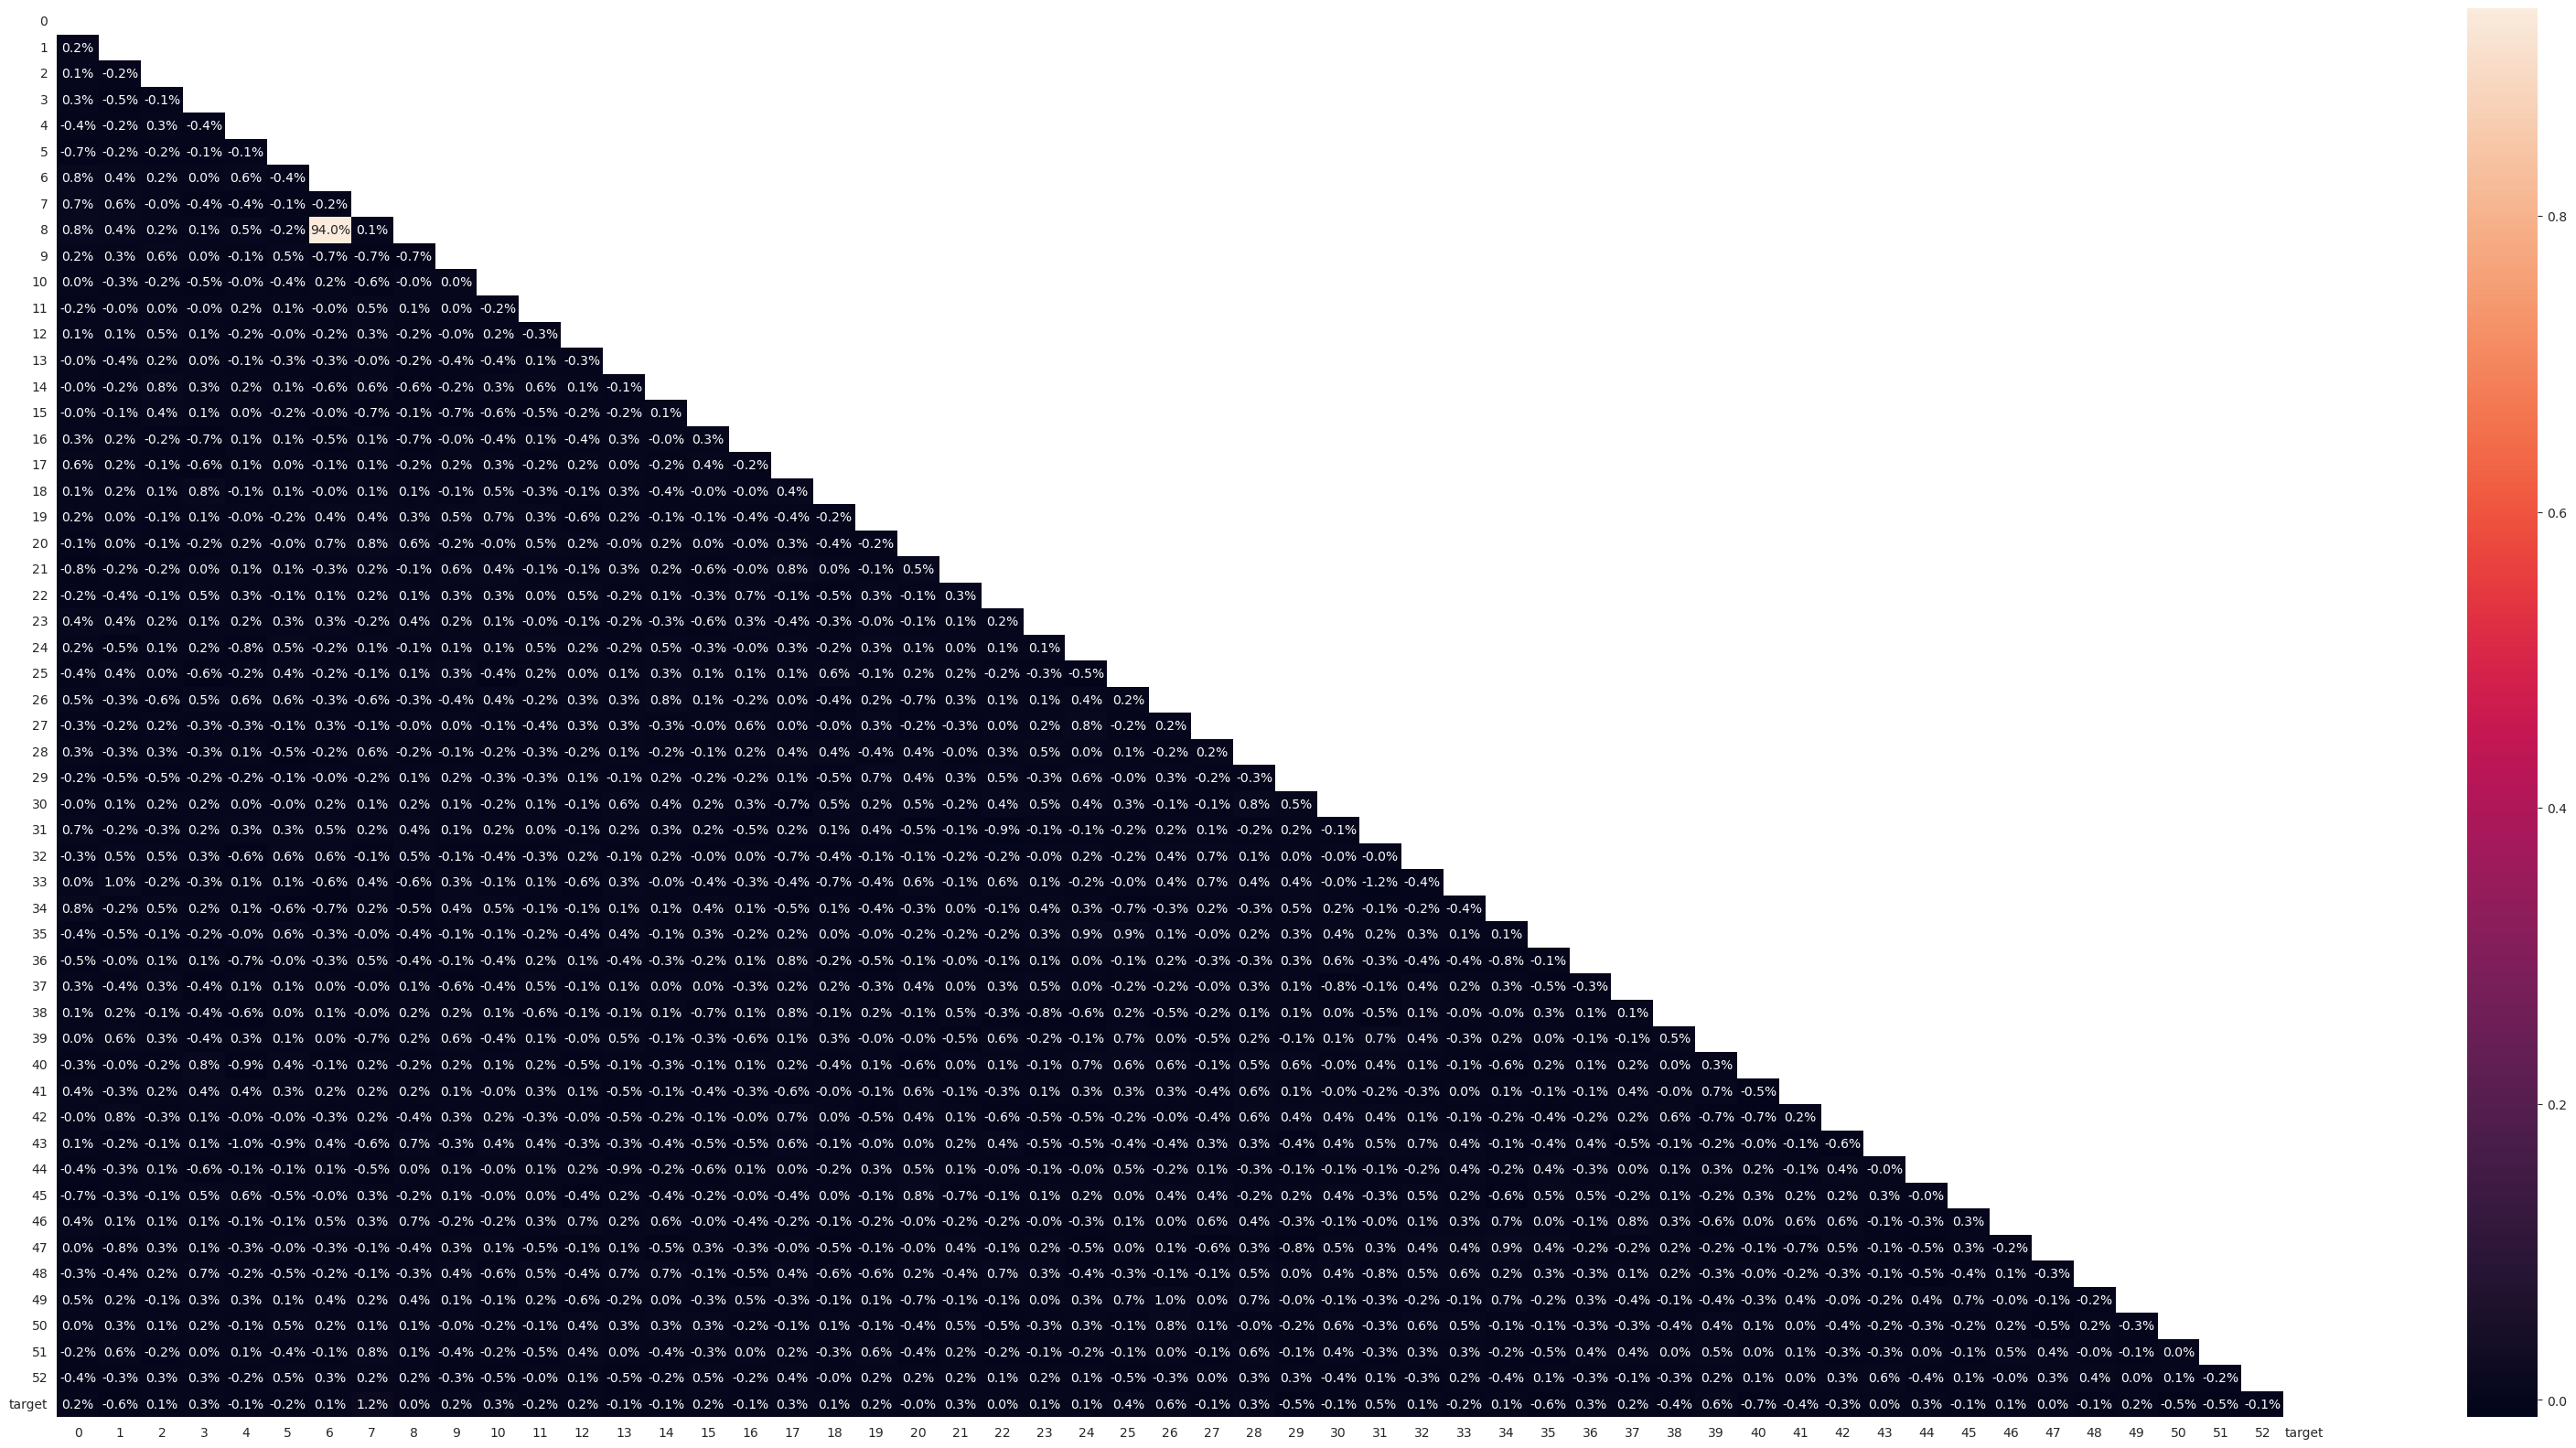

In [11]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    plt.figure(figsize=(40,20))
    sns.heatmap(corr, annot=True, fmt=".1%", mask=mask)

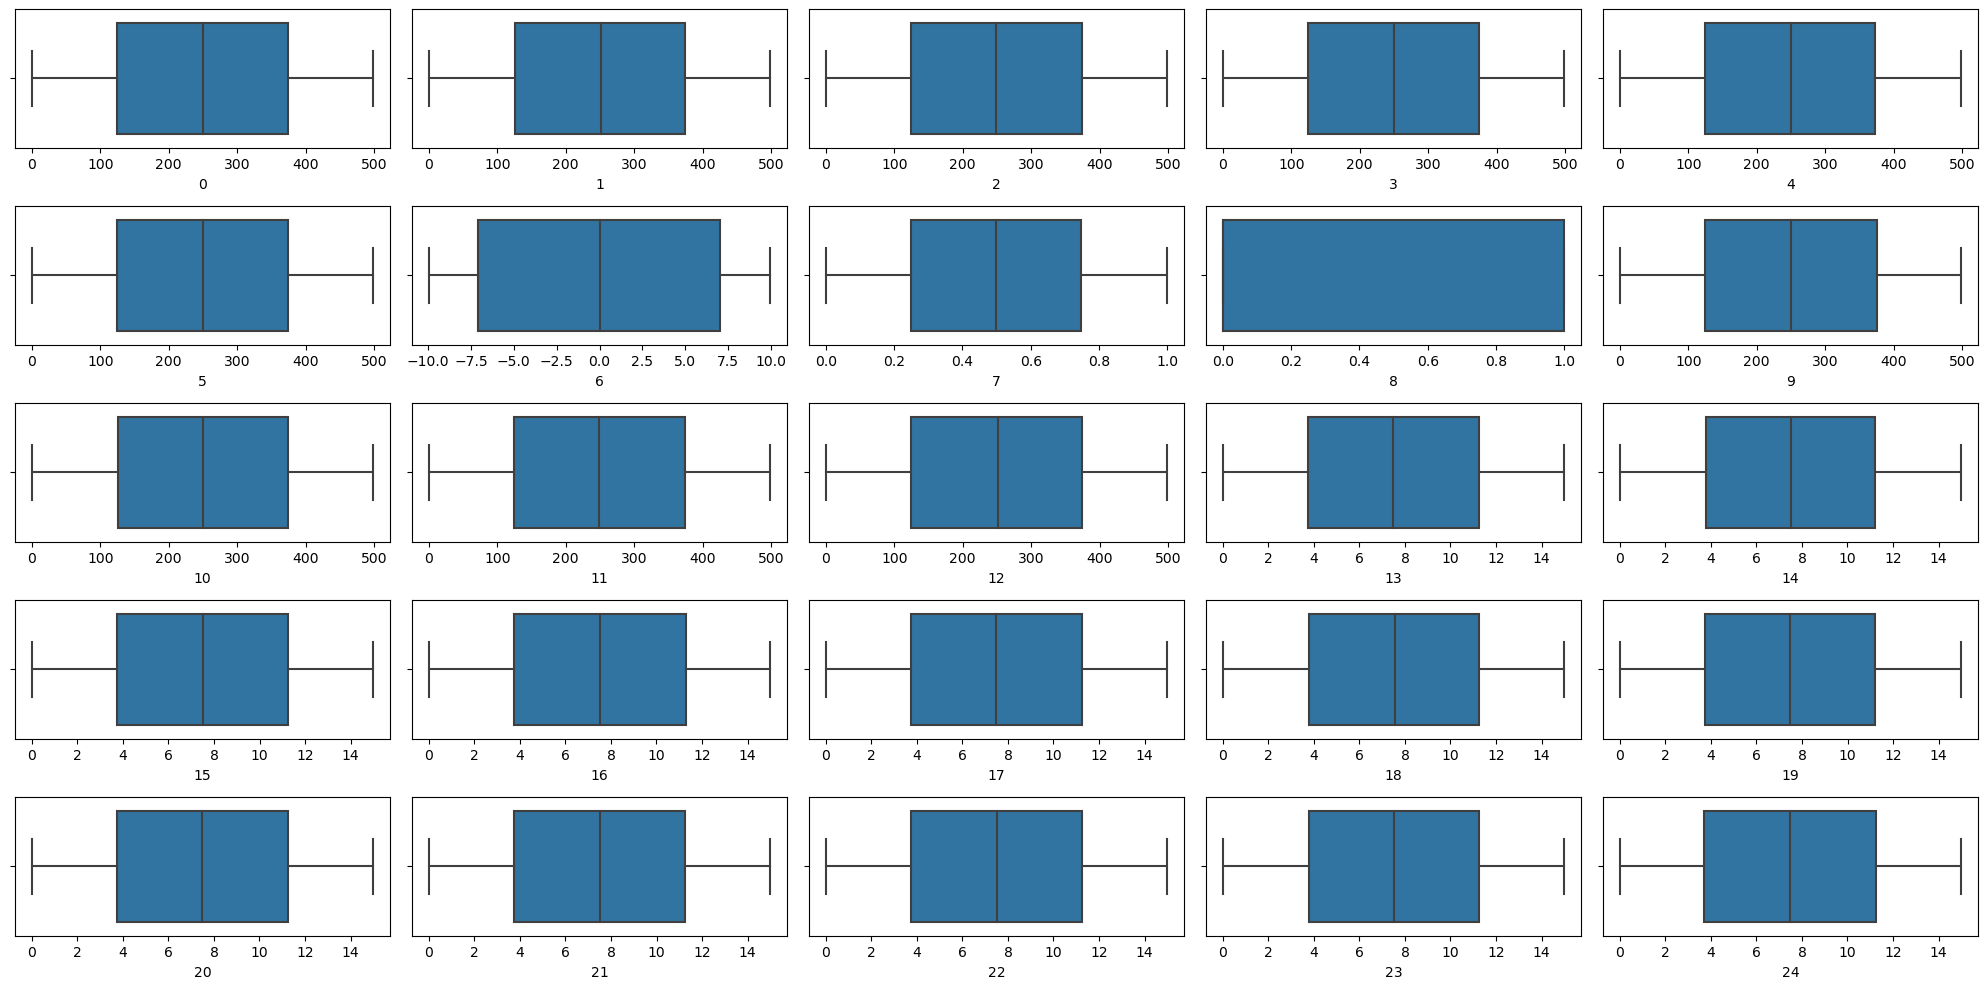

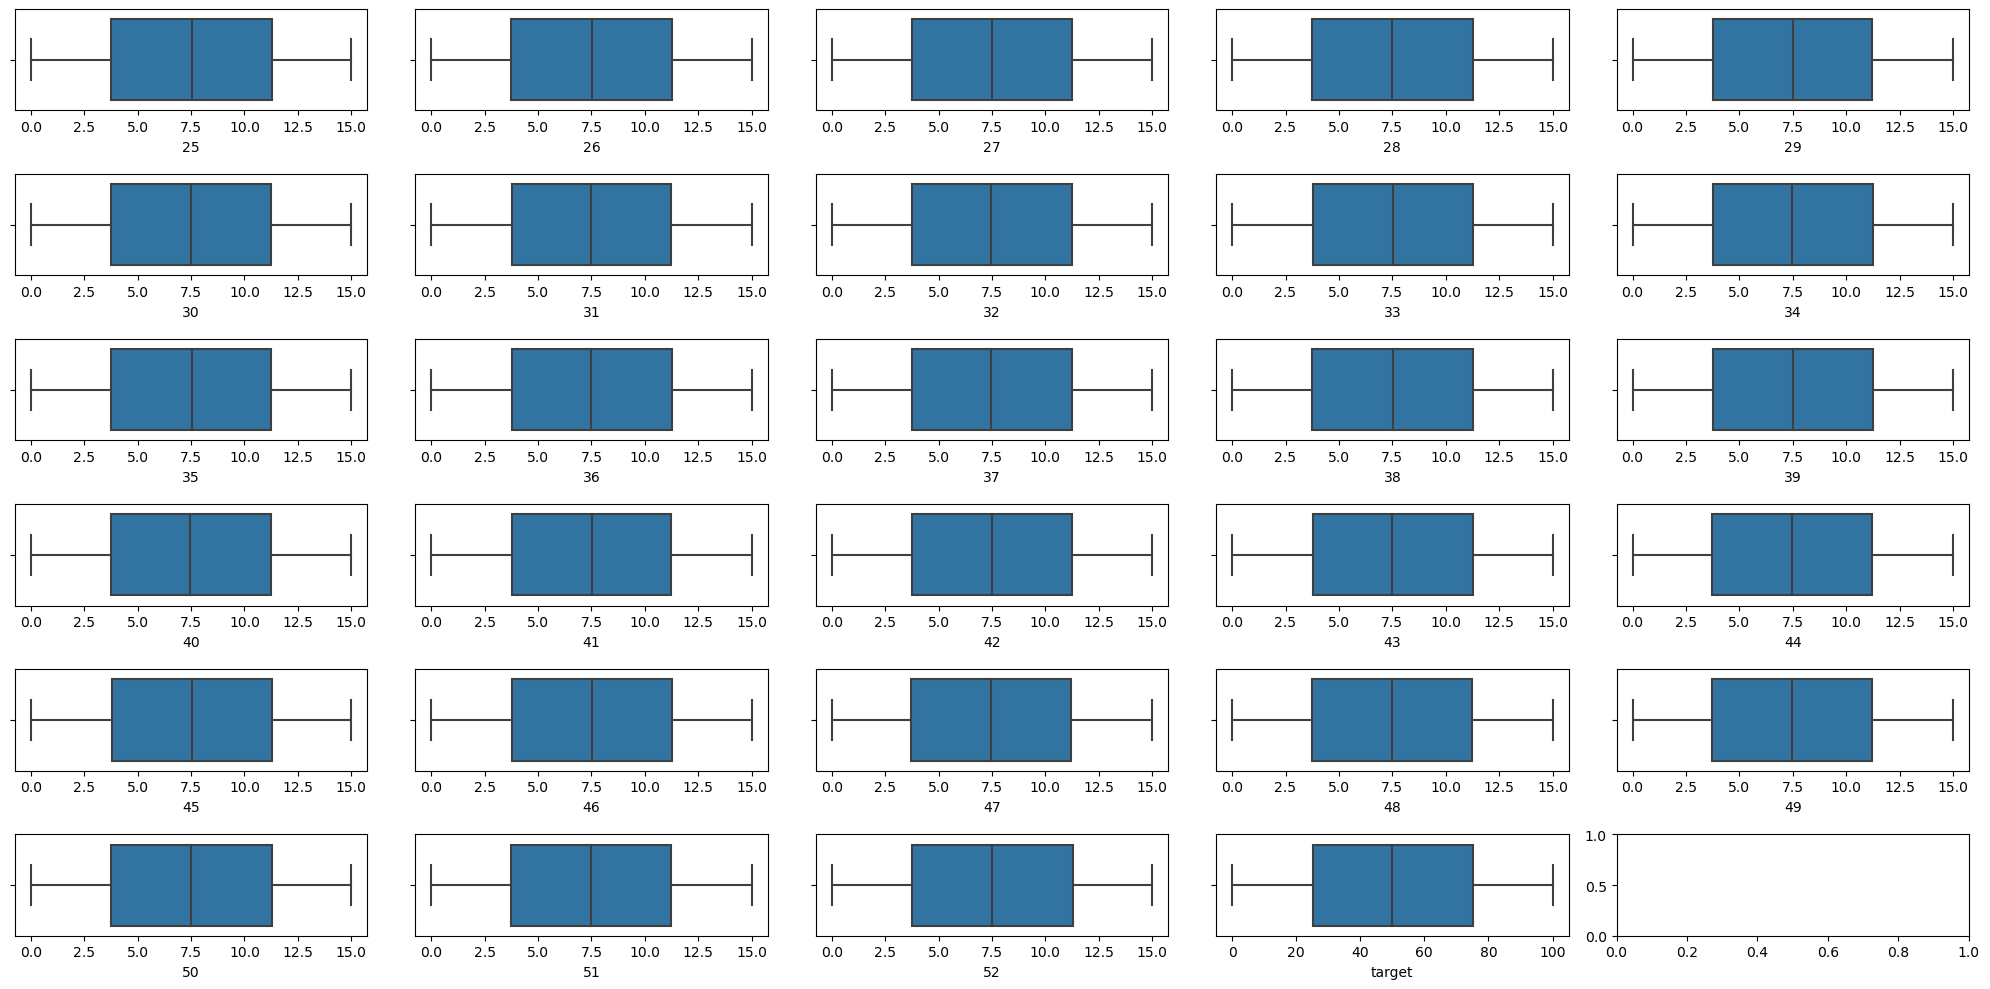

In [12]:
figure1, ax1 = plt.subplots(5, 5, figsize=(20,10))
i, j = 0, 0
for el in df.columns[:25]:
    if j == 5:
        j = 0
        i += 1
    sns.boxplot(x=el, data=df, ax=ax1[i][j], orient='v')
    j += 1

plt.tight_layout()

figure2, ax2 = plt.subplots(6, 5, figsize=(20,10))
i, j = 0, 0
for el in df.columns[25:]:
    if j == 5:
        j = 0
        i += 1
    sns.boxplot(x=el, data=df, ax=ax2[i][j], orient='v')
    j += 1

plt.tight_layout()

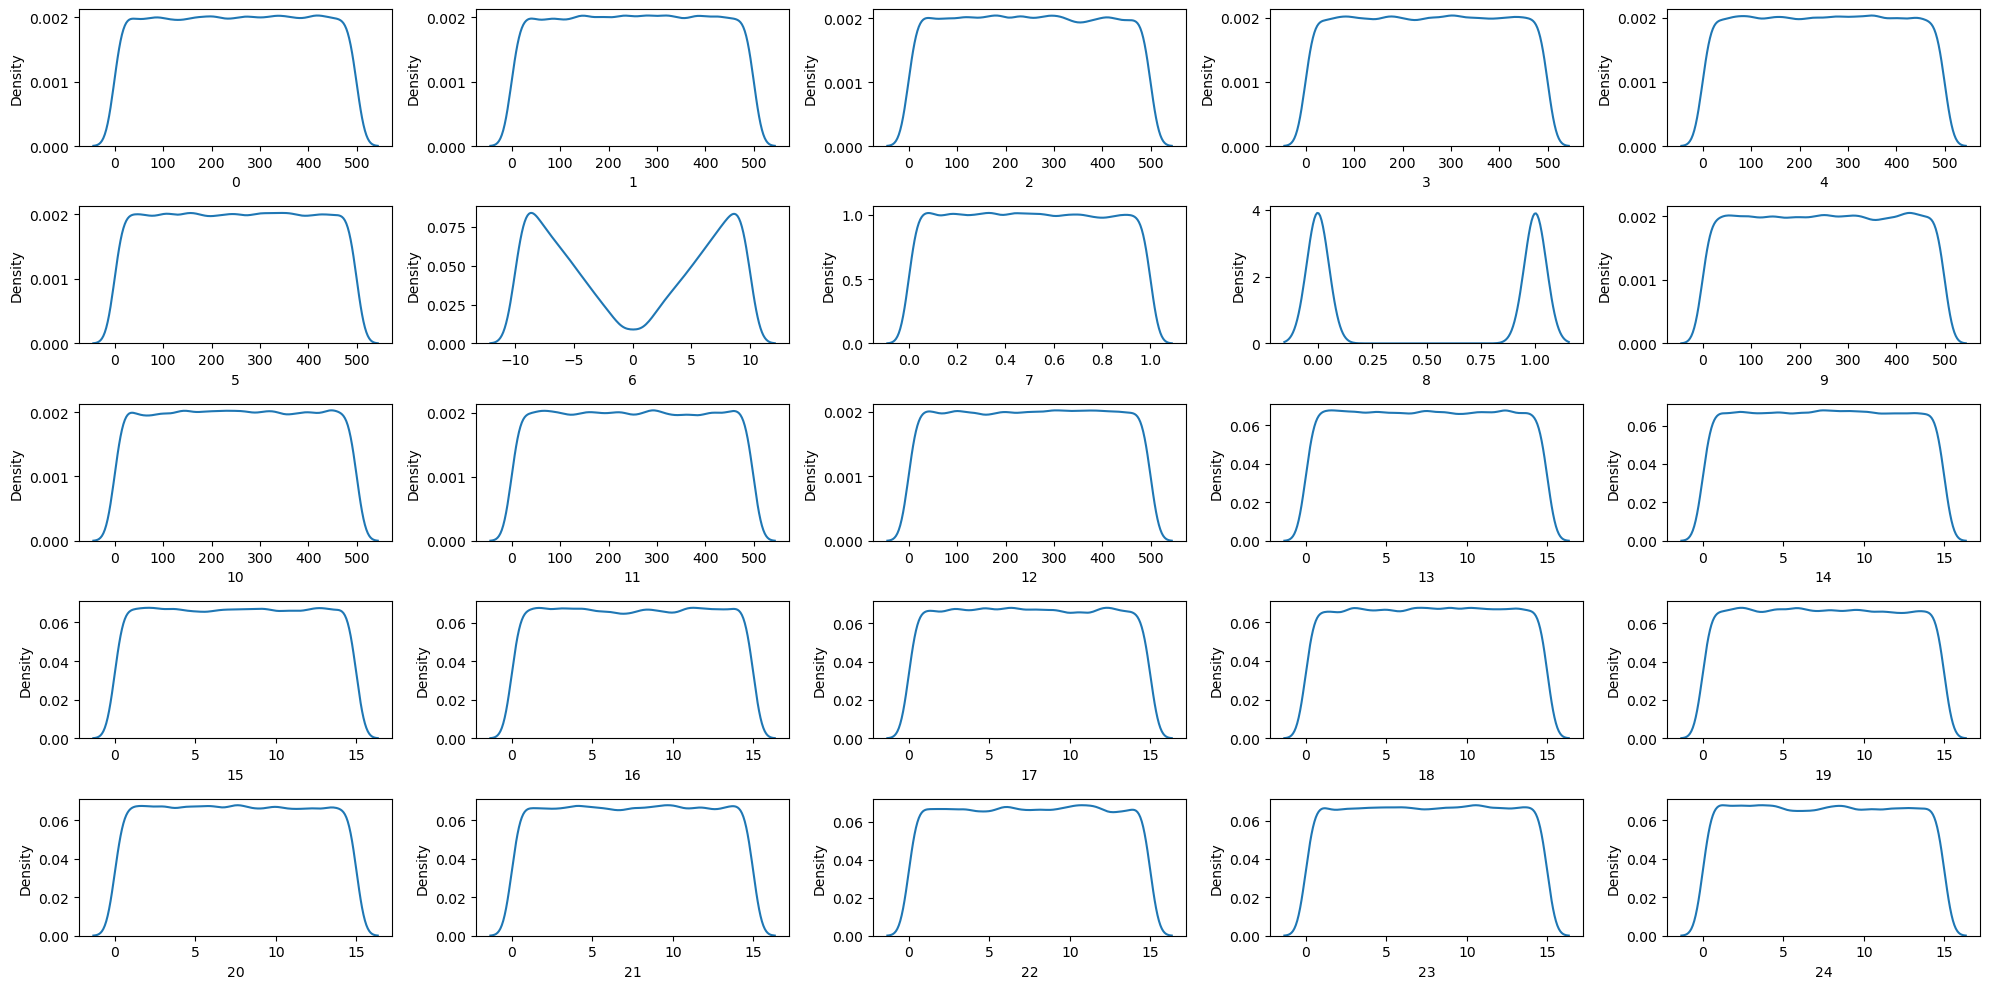

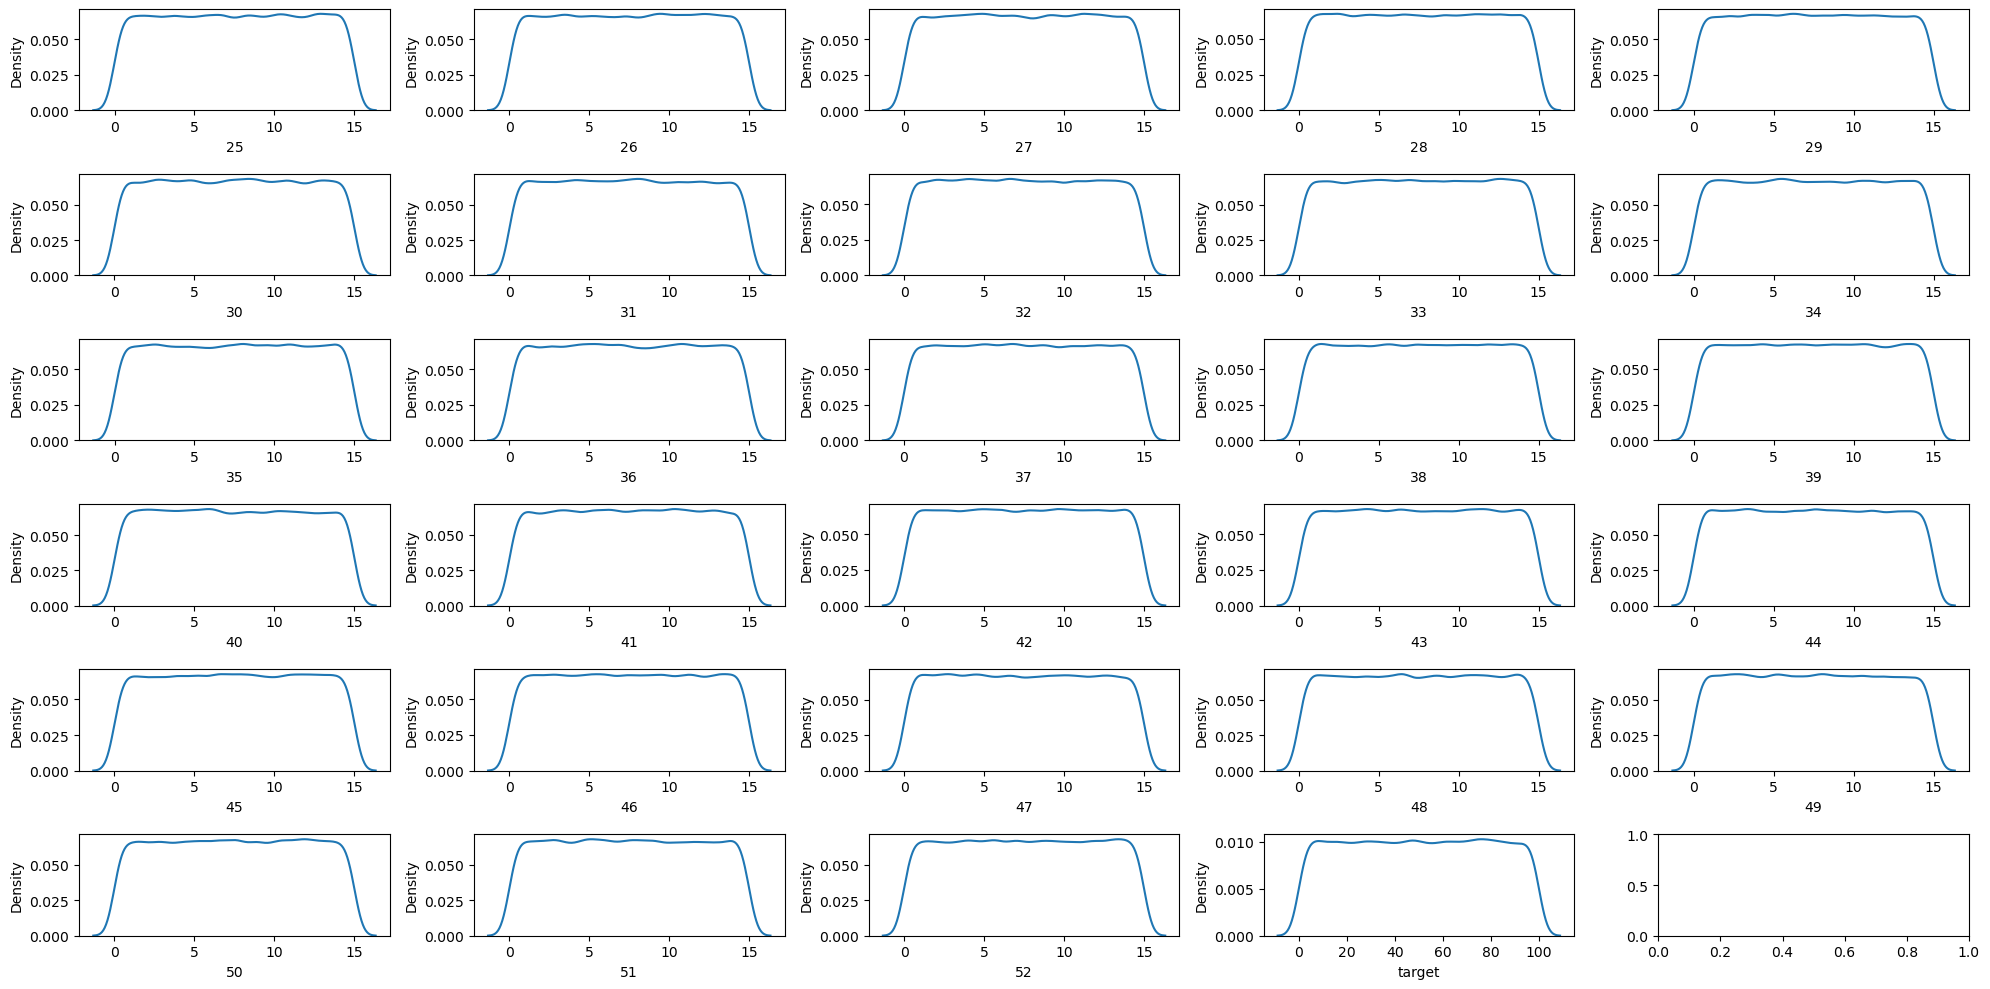

In [13]:
figure1, ax1 = plt.subplots(5, 5, figsize=(20,10))
i, j = 0, 0
for el in df.columns[:25]:
    if j == 5:
        j = 0
        i += 1
    sns.kdeplot(data=df[el], ax=ax1[i][j])
    j += 1

plt.tight_layout()

figure2, ax2 = plt.subplots(6, 5, figsize=(20,10))
i, j = 0, 0
for el in df.columns[25:]:
    if j == 5:
        j = 0
        i += 1
    sns.kdeplot(data=df[el], ax=ax2[i][j])
    j += 1

plt.tight_layout()

<b>Conclusion:</b>

- we have 53 numerical features
- no missing values
- our date have some patterm, by which its distributed (uniformal at almoust)
- feature 8 binary distributed
- no duplicates
- our features do not correlate, except on pair (6, 8)
- our data without significant outliers
- all features and target have the same distribution (uniformal-like), but with different param, except on pair (6, 8) (bimodal-distributed)

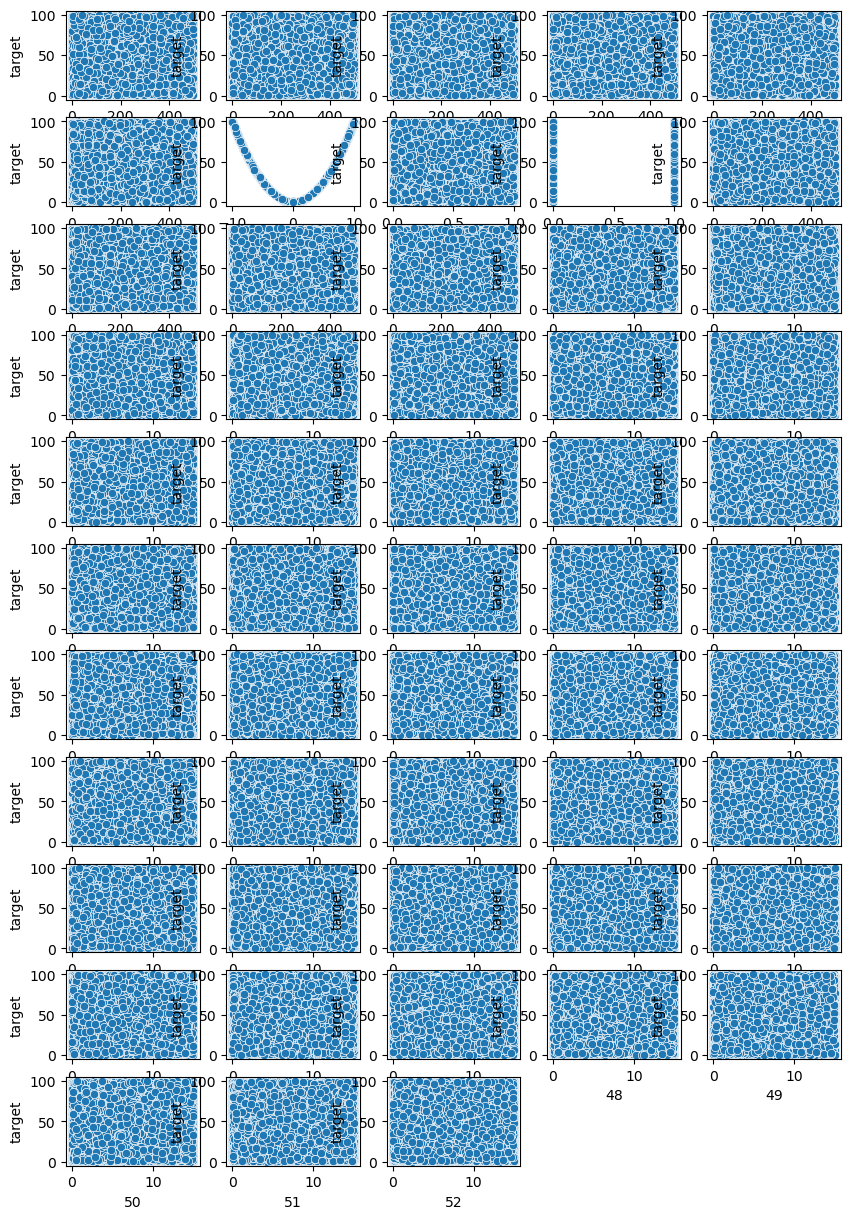

In [9]:
plt.figure(figsize=(10, 15))
for i, col in enumerate(df.columns.drop('target')):
    ax = plt.subplot(11, 5, i + 1)
    sns.scatterplot(x=df[col], y=df['target'], ax=ax)

<Axes: xlabel='8', ylabel='6'>

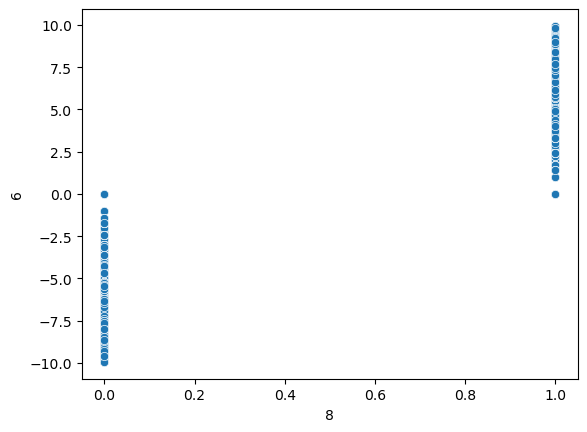

In [16]:
sns.scatterplot(x=df['8'], y=df['6'])

<b>Conclusion:</b>

- We see the quadratic dependence of the target on 8 features, and we also see a direct relationship between 8 and 6 features.

# Modeling
Therefore, we can assume that all other features except 6 and 8 carry noise. In order to check this, we will use a model based on decision trees and check the significance of features, and also check the quality of the model with all features and only two.

In [4]:
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

model = LGBMRegressor()
model.fit(train_X, train_y)
pred = model.predict(valid_X)

print(f'Score: {model.score(valid_X, valid_y)}')
print(f'MAE: {mean_absolute_error(pred, valid_y)}')
print(f'MAPE: {mean_absolute_percentage_error(pred, valid_y)}')
print(f'MSE: {mean_squared_error(pred, valid_y)}')

Score: 0.999999496326757
MAE: 0.015847962922429366
MAPE: 0.0019503726498148574
MSE: 0.0004197337734745037


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

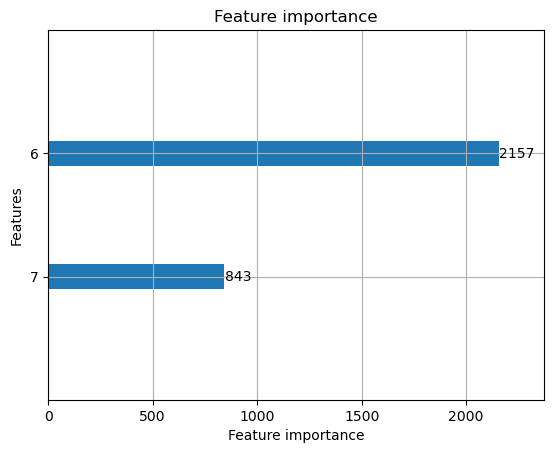

In [5]:
plot_importance(model)

We got the fact that only 2 features have the values 6 and 7, it is strange that 7 replaced 8. Let's check if they will mate better on their own.

In [6]:
model.fit(train_X[['6', '7']], train_y)
pred = model.predict(valid_X[['6', '7']])

print(f'Score: {model.score(valid_X[["6", "7"]], valid_y)}')
print(f'MAE: {mean_absolute_error(pred, valid_y)}')
print(f'MAPE: {mean_absolute_percentage_error(pred, valid_y)}')
print(f'MSE: {mean_squared_error(pred, valid_y)}')

Score: 0.999999496326757
MAE: 0.015847962922429366
MAPE: 0.0019503726498148574
MSE: 0.0004197337734745037


Got the same effect. Most likely, this is explained by the fact that LightGBM automatically determines the importance of a feature and its impact on the result. Let's test this idea on less complex models

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


model = LinearRegression()
model.fit(train_X, train_y)
pred = model.predict(valid_X)

print(f'Score: {model.score(valid_X, valid_y)}')
print(f'MAE: {mean_absolute_error(pred, valid_y)}')
print(f'MAPE: {mean_absolute_percentage_error(pred, valid_y)}')
print(f'MSE: {mean_squared_error(pred, valid_y)}')


poly = PolynomialFeatures(degree=2, include_bias=True)
train_X_new = poly.fit_transform(train_X[['6', '7']])
valid_X_new = poly.transform(valid_X[['6', '7']])
model.fit(train_X_new, train_y)
pred = model.predict(valid_X_new)

print(f'Score: {model.score(valid_X_new, valid_y)}')
print(f'MAE: {mean_absolute_error(pred, valid_y)}')
print(f'MAPE: {mean_absolute_percentage_error(pred, valid_y)}')
print(f'MSE: {mean_squared_error(pred, valid_y)}')

Score: -0.0018690375789123248
MAE: 25.01521050700929
MAPE: 0.5011917738119562
MSE: 834.9029405591634
Score: 1.0
MAE: 1.7238279886288195e-14
MAPE: 1.340070407083457e-15
MSE: 4.41818194758324e-28


We got a wonderful result! I think this confirms the opinion of the quadratic dependence of feature 6 and the fact that the rest of the data has the character of white noise.

In [21]:
test_new = poly.transform(test[['6', '7']])
pred = model.predict(test_new)
pred = pd.DataFrame(pred, columns=['target'])
pred.to_csv('prediction.csv', index=False)